In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [78]:
# Generar un DataFrame de ejemplo para práctica de redes neuronales

np.random.seed(42)

# Definir el número de muestras
num_samples = 1000

# Generar características aleatorias
age = np.random.randint(18, 70, num_samples)  # Edad
income = np.random.randint(20000, 150000, num_samples)  # Ingresos anuales
credit_score = np.random.randint(300, 850, num_samples)  # Puntuación de crédito
loan_amount = np.random.randint(5000, 50000, num_samples)  # Monto del préstamo
loan_term = np.random.randint(12, 60, num_samples)  # Plazo del préstamo en meses

# Generar una salida binaria basada en una combinación de las características
default = ((income < 50000) & (credit_score < 600)) | (loan_amount > 30000)

# Crear el DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'CreditScore': credit_score,
    'LoanAmount': loan_amount,
    'LoanTerm': loan_term,
    'Default': default.astype(int)
})

df.head(10)


,Age,Income,CreditScore,LoanAmount,LoanTerm,Default
0,56,125186,414,12239,31,0
1,69,54674,622,11710,35,0
2,46,55854,339,26384,33,0
3,32,66271,339,26038,40,0
4,60,93688,588,45846,33,1
5,25,58518,561,27447,55,0
6,38,131076,515,7285,20,0
7,56,30267,446,42991,48,1
8,36,110825,635,18521,21,0
9,40,21062,467,11971,47,1


In [47]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 1000
Total de variables disponibles (columnas) = 6 
Columnas que cuentan con un valor nulo -
Age            0
Income         0
CreditScore    0
LoanAmount     0
LoanTerm       0
Default        0
dtype: int64


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1000 non-null   int32
 1   Income       1000 non-null   int32
 2   CreditScore  1000 non-null   int32
 3   LoanAmount   1000 non-null   int32
 4   LoanTerm     1000 non-null   int32
 5   Default      1000 non-null   int32
dtypes: int32(6)
memory usage: 23.6 KB


Text(0.5, 1.0, 'Default')

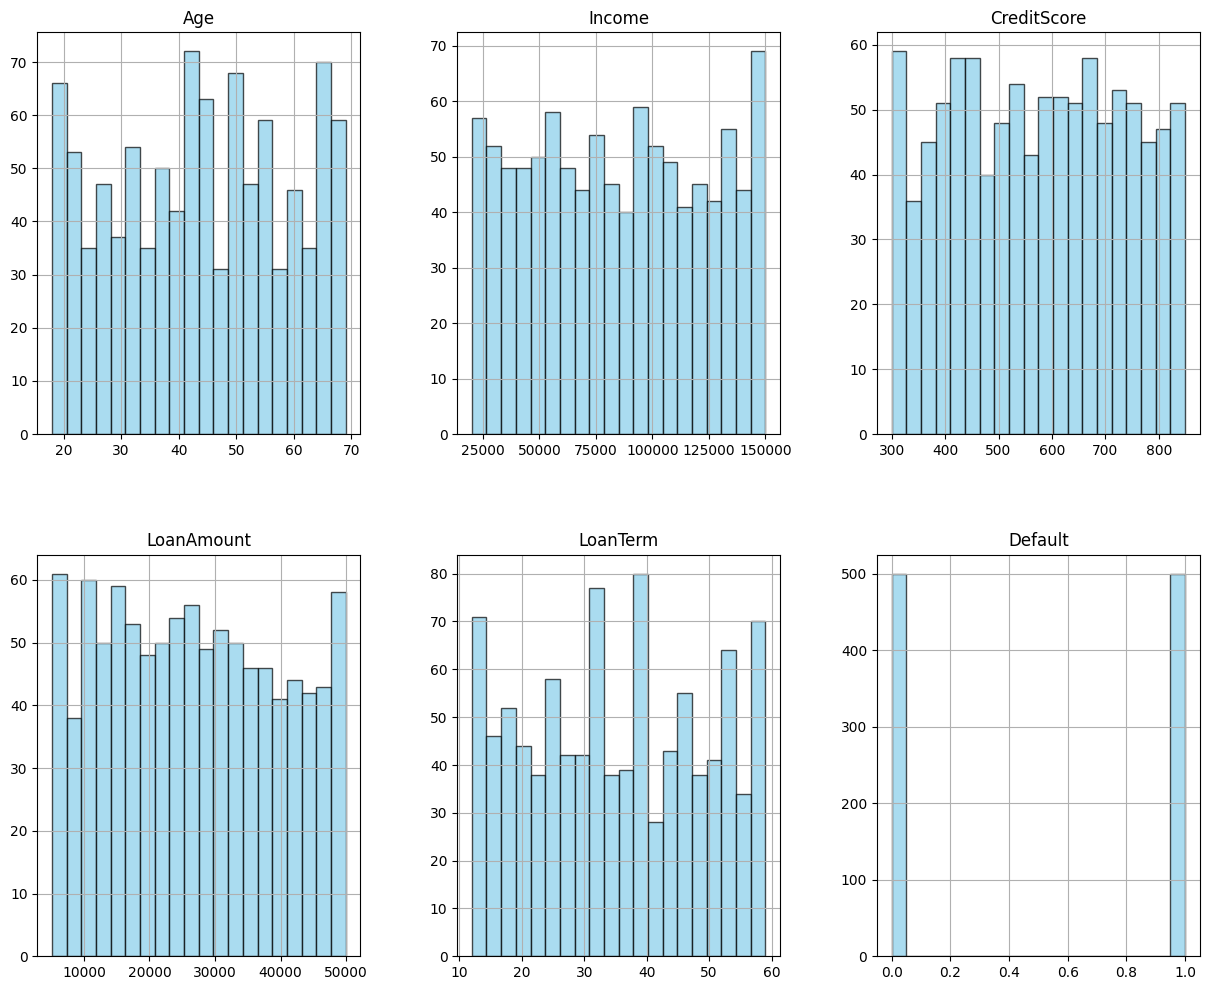

In [49]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Age')
axes[0, 1].set_title('Income')
axes[0, 2].set_title('CreditScore')
axes[1, 0].set_title('LoanAmount')
axes[1, 1].set_title('LoanTerm')
axes[1, 2].set_title('Default')

In [50]:
# Definir características numéricas y categóricas

numeric_features = ['Age','Income','CreditScore','LoanAmount','LoanTerm']

In [51]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [52]:
df2.head()

,Age,Income,CreditScore,LoanAmount,LoanTerm,Default
0,0.812959,1.048640,-1.018735,-1.132181,-0.311433,0
1,1.680578,-0.787052,0.298065,-1.173108,-0.024530,0
2,0.145560,-0.756332,-1.493542,-0.037844,-0.167982,0
3,-0.788799,-0.485138,-1.493542,-0.064612,0.334099,0
4,1.079919,0.228629,0.082819,1.467847,-0.167982,1


# Redes Neuronales

In [53]:
# Definir X e y
X = df2.drop(columns=['Default'])
y = df2['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Calcular el número de muestras de cada clase
#class_counts = y_train.value_counts()  # type: ignore
#total_samples = len(y_train)  # type: ignore

# Verificar los valores en class_counts
#print("Recuento de clases en y_train:", class_counts)

# Calcular los pesos de cada clase
#weights = {
 #   0: total_samples / (2 * class_counts[0]),  # 0 / 2982 = 5880 / 2982*2 = 5880 / 5,964
  #  1: total_samples / (2 * class_counts[1])   # 1 / 2898 = 5880 / 2898*2 = 5880 / 5,796
#}

#print("Pesos de clase:", weights)

In [55]:
oculta = tf.keras.layers.Dense(units=1024, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)

oculta1 = tf.keras.layers.Dense(units=512, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)

oculta2 = tf.keras.layers.Dense(units=256, activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)

oculta3 = tf.keras.layers.Dense(units=128)
dropout3 = tf.keras.layers.Dropout(0.3)

oculta4 = tf.keras.layers.Dense(units=64, activation='relu')
dropout4 = tf.keras.layers.Dropout(0.3)

oculta5 = tf.keras.layers.Dense(units=32, activation='relu')
dropout5 = tf.keras.layers.Dropout(0.3)

oculta6 = tf.keras.layers.Dense(units=16)
dropout6 = tf.keras.layers.Dropout(0.3)

oculta7 = tf.keras.layers.Dense(units=8, activation='relu')
dropout7 = tf.keras.layers.Dropout(0.3)

oculta8 = tf.keras.layers.Dense(units=4, activation='relu')
dropout8 = tf.keras.layers.Dropout(0.3)

oculta9 = tf.keras.layers.Dense(units=2)
dropout9 = tf.keras.layers.Dropout(0.3)

oculta10 = tf.keras.layers.Dense(units=1, activation='relu')
dropout10 = tf.keras.layers.Dropout(0.3)

salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,oculta3,dropout3,
                              oculta4,dropout4,oculta5,dropout5,oculta6,
                              dropout6,oculta7,dropout7,oculta8,dropout8
                              ,oculta9,dropout9,oculta10,dropout10,salida])

In [56]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [58]:
# Entrenar el modelo
print('Entrenando modelo')
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])
print('Modelo entrenado')

Entrenando modelo
Modelo entrenado


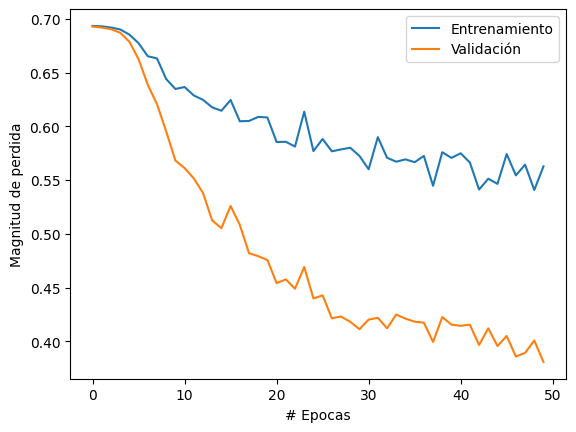

In [59]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [60]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :5] = scaler.transform(nuevo_dato[:, :5])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')    

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
El resultado es: 0.5251970291137695


In [77]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, No cumple con los requisitos')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, Si cumple con los requisitos')

El resultado es: 1
El resultado es: 1, predicción: 1, Si cumple con los requisitos


In [62]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Default_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
        Age    Income  CreditScore  LoanAmount  LoanTerm  Default  \
0  0.812959  1.048640    -1.018735   -1.132181 -0.311433        0   
1  1.680578 -0.787052     0.298065   -1.173108 -0.024530        0   
2  0.145560 -0.756332    -1.493542   -0.037844 -0.167982        0   
3 -0.788799 -0.485138    -1.493542   -0.064612  0.334099        0   
4  1.079919  0.228629     0.082819    1.467847 -0.167982        1   

   Default_pred  
0             0  
1             0  
2             1  
3             1  
4             1  


In [63]:
# Comparar las predicciones con los valores reales
correct_prediction = (df2['Default'] == df2['Default_pred']).sum()

In [64]:
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 95.60%
Margen de error: 4.40%


In [65]:
df2['Default'].value_counts()
    

Default
0    500
1    500
Name: count, dtype: int64

In [66]:
df2['Default_pred'].value_counts()


Default_pred
1    512
0    488
Name: count, dtype: int64

# 1. Evaluación

```python
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
oculta2 = tf.keras.layers.Dense(units=8, activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)
oculta3 = tf.keras.layers.Dense(units=4)
dropout3 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,oculta3,dropout3,salida])

historial = modelo.fit(X_train, y_train, epochs=2000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Precisión: 92.40%
Margen de error: 7.60%

# 2. Evaluación

```python
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)

oculta1 = tf.keras.layers.Dense(units=16, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)

oculta2 = tf.keras.layers.Dense(units=8, activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)

oculta3 = tf.keras.layers.Dense(units=4)
dropout3 = tf.keras.layers.Dropout(0.3)

oculta4 = tf.keras.layers.Dense(units=16, activation='relu')
dropout4 = tf.keras.layers.Dropout(0.3)

oculta5 = tf.keras.layers.Dense(units=8, activation='relu')
dropout5 = tf.keras.layers.Dropout(0.3)

oculta6 = tf.keras.layers.Dense(units=4)
dropout6 = tf.keras.layers.Dropout(0.3)

oculta7 = tf.keras.layers.Dense(units=16, activation='relu')
dropout7 = tf.keras.layers.Dropout(0.3)

oculta8 = tf.keras.layers.Dense(units=8, activation='relu')
dropout8 = tf.keras.layers.Dropout(0.3)

oculta9 = tf.keras.layers.Dense(units=4)
dropout9 = tf.keras.layers.Dropout(0.3)

oculta10 = tf.keras.layers.Dense(units=16, activation='relu')
dropout10 = tf.keras.layers.Dropout(0.3)

salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,oculta3,dropout3,
                              oculta4,dropout4,oculta5,dropout5,oculta6,
                              dropout6,oculta7,dropout7,oculta8,dropout8
                              ,oculta9,dropout9,oculta10,dropout10,salida])

historial = modelo.fit(X_train, y_train, epochs=2000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Precisión: 90.60%
Margen de error: 9.40%

# 3. Evaluación
```python
oculta = tf.keras.layers.Dense(units=1024, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)

oculta1 = tf.keras.layers.Dense(units=512, activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)

oculta2 = tf.keras.layers.Dense(units=256, activation='relu')
dropout2 = tf.keras.layers.Dropout(0.3)

oculta3 = tf.keras.layers.Dense(units=128)
dropout3 = tf.keras.layers.Dropout(0.3)

oculta4 = tf.keras.layers.Dense(units=64, activation='relu')
dropout4 = tf.keras.layers.Dropout(0.3)

oculta5 = tf.keras.layers.Dense(units=32, activation='relu')
dropout5 = tf.keras.layers.Dropout(0.3)

oculta6 = tf.keras.layers.Dense(units=16)
dropout6 = tf.keras.layers.Dropout(0.3)

oculta7 = tf.keras.layers.Dense(units=8, activation='relu')
dropout7 = tf.keras.layers.Dropout(0.3)

oculta8 = tf.keras.layers.Dense(units=4, activation='relu')
dropout8 = tf.keras.layers.Dropout(0.3)

oculta9 = tf.keras.layers.Dense(units=2)
dropout9 = tf.keras.layers.Dropout(0.3)

oculta10 = tf.keras.layers.Dense(units=1, activation='relu')
dropout10 = tf.keras.layers.Dropout(0.3)

salida = tf.keras.layers.Dense(units=1,activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,oculta2,dropout2,oculta3,dropout3,
                              oculta4,dropout4,oculta5,dropout5,oculta6,
                              dropout6,oculta7,dropout7,oculta8,dropout8
                              ,oculta9,dropout9,oculta10,dropout10,salida])

historial = modelo.fit(X_train, y_train, epochs=2000, batch_size=16, verbose=False, validation_split=0.2, callbacks=[early_stopping])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Precisión: 94.60%
Margen de error: 5.40%

In [75]:
# Guardar el modelo en formato nativo de Keras
modelo.save('modelo_entrenado.keras')

# Cargar el modelo para evaluar con nuevos datos
nuevo_modelo = tf.keras.models.load_model('modelo_entrenado.keras')

# Preparar los nuevos datos (supongamos que los nuevos datos están en un DataFrame llamado nuevos_datos)
nuevos_datos = pd.DataFrame({
    'Age': [35, 42],
    'Income': [45000, 55000],
    'CreditScore': [700, 650],
    'LoanAmount': [20000, 25000],
    'LoanTerm': [24, 36]
})

# Estandarizar los nuevos datos
numeric_features = ['Age', 'Income', 'CreditScore', 'LoanAmount', 'LoanTerm']
nuevos_datos[numeric_features] = scaler.transform(nuevos_datos[numeric_features])

# Hacer predicciones con el modelo cargado
predicciones = nuevo_modelo.predict(nuevos_datos)
print("Predicciones para nuevos datos:", predicciones)

# Convertir las predicciones a etiquetas binarias
prediccion_binaria = (predicciones > 0.5).astype(int)
print("Predicciones binarias para nuevos datos:", prediccion_binaria)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicciones para nuevos datos: [[0.02944687]
 [0.3539375 ]]
Predicciones binarias para nuevos datos: [[0]
 [0]]


In [76]:
# Convertir las predicciones binarias a DataFrame
prediccion_binaria_df = pd.DataFrame(prediccion_binaria, columns=['Prediction'])

# Mostrar las primeras filas
print(prediccion_binaria_df.head())

   Prediction
0           0
1           0


```python
Edad / Ingresos Anuales / Puntuación de crédito / Monto del préstamo / Plazo del préstamo en meses / Default 0 (No) - 1 (Si)